In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Figure 3b

Text(0.2, 2.1, '0.24')

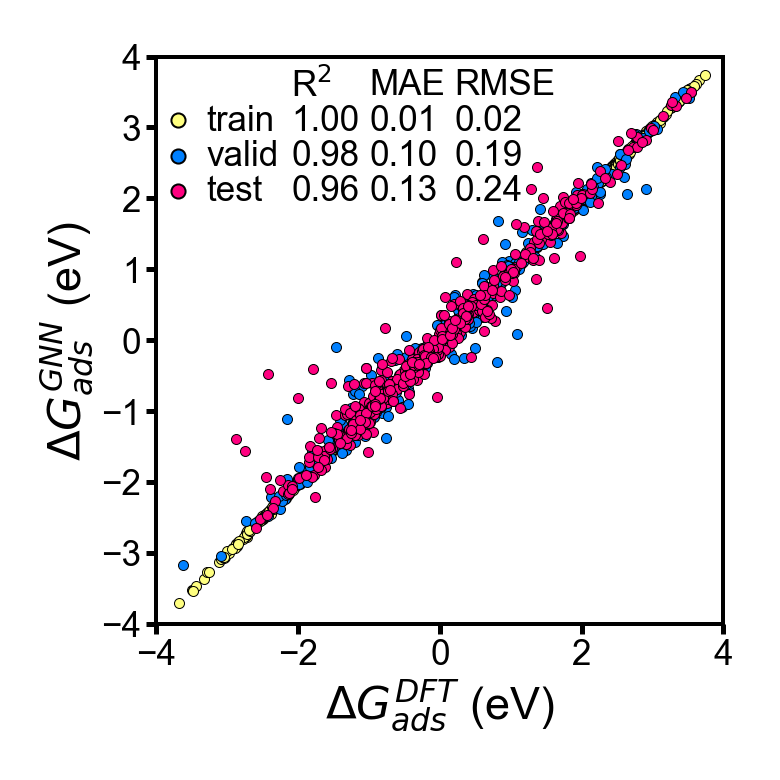

In [4]:
dfv=pd.read_excel(r'dftVgnn.xlsx',index_col=0)
x=dfv['DFT'].values
y=dfv['GNN'].values

plt.rc('font',family='Arial')
fig=plt.figure(figsize=(5/2.54,5/2.54),dpi=360)

ax0=fig.add_axes([0,0,1,1])
ax0.set_xlim(0,1);ax0.set_ylim(0,1);ax0.set_xticks([]);ax0.set_yticks([]);ax0.axis('off')
ax0.patch.set_alpha(0.0)

ax1=fig.add_axes([0.17,0.17,0.8,0.8])
ax1.tick_params(length=2,width=1,labelsize=7,pad=1)

ax1.set_xlabel('$\Delta G_{ads}^{DFT}$ (eV)',fontsize=9,labelpad=1)
ax1.set_ylabel('$\Delta G_{ads}^{GNN}$ (eV)',fontsize=9,labelpad=1)
ax1.set_xlim([-4,4])
ax1.set_ylim([-4,4])

cs=['#ffff80', '#0080ff', '#ff0080']
s=4
lw=0.2
ax1.scatter(x[:5000],y[:5000],c=cs[0],s=s,ec='k',lw=lw)
ax1.scatter(x[5000:5500],y[5000:5500],c=cs[1],s=s,ec='k',lw=lw)
ax1.scatter(x[5500:6000],y[5500:6000],c=cs[2],s=s,ec='k',lw=lw)

ax1.scatter([-3.7],[3.1],c=cs[0],s=s*2,ec='k',lw=lw*2)
ax1.text(-3.3,3.1,'train',va='center',ha='left',fontsize=7)
ax1.scatter([-3.7],[2.6],c=cs[1],s=s*2,ec='k',lw=lw*2)
ax1.text(-3.3,2.6,'valid',va='center',ha='left',fontsize=7)
ax1.scatter([-3.7],[2.1],c=cs[2],s=s*2,ec='k',lw=lw*2)
ax1.text(-3.3,2.1,'test',va='center',ha='left',fontsize=7)

x1=-2.1
x2=-1
x3=0.2
ax1.text(x1,3.6,'R$^2$',va='center',ha='left',fontsize=7)
ax1.text(x1,3.1,'1.00',va='center',ha='left',fontsize=7)
ax1.text(x1,2.6,'0.98',va='center',ha='left',fontsize=7)
ax1.text(x1,2.1,'0.96',va='center',ha='left',fontsize=7)

ax1.text(x2,3.6,'MAE',va='center',ha='left',fontsize=7)
ax1.text(x2,3.1,'0.01',va='center',ha='left',fontsize=7)
ax1.text(x2,2.6,'0.10',va='center',ha='left',fontsize=7)
ax1.text(x2,2.1,'0.13',va='center',ha='left',fontsize=7)

ax1.text(x3,3.6,'RMSE',va='center',ha='left',fontsize=7)
ax1.text(x3,3.1,'0.02',va='center',ha='left',fontsize=7) 
ax1.text(x3,2.6,'0.19',va='center',ha='left',fontsize=7)
ax1.text(x3,2.1,'0.24',va='center',ha='left',fontsize=7)

# fig.savefig('Figure_3_b.tif',dpi=360)

# Figure 3c

In [5]:
def gra_bar(ax,X,Y,w,a,ek,lw,c,z):
    for i,x in enumerate(X):
        y=Y[i]
        Gradient_Graphics6(ax,[x,x+w,x+w,x],[0,0,y,y],[ek,lw],[(0,'w'),(1,c)],[[0],[1]],True,1,z)

In [6]:
from matplotlib.patches import PathPatch
from matplotlib.path import Path
from matplotlib import colors
def Gradient_Graphics6(p1_axes,p2_x,p3_y,p4_edge=['k',3],p5_colormap=[(0,'r'),(1,'w')],p6_color_matrix=[[0],[1]],p7_close_patch=False,p8_alpha=1,p9_zorder=666):
    cmap=colors.LinearSegmentedColormap.from_list('Cmap',p5_colormap,N=256)
    x=p2_x;y=p3_y
    if p7_close_patch:
        x.append(x[0])
        y.append(y[0])
    path=Path(np.array([x,y]).transpose())
    patch=PathPatch(path,facecolor='none',edgecolor=p4_edge[0],lw=p4_edge[1],zorder=p9_zorder+1)
    p1_axes.add_patch(patch)
    p1_axes.imshow(p6_color_matrix,interpolation="bicubic",origin='lower',aspect="auto",clip_path=patch,clip_on=True,
              alpha=p8_alpha,cmap=cmap,extent=[min(p2_x)-0.01,max(p2_x)+0.01,min(p3_y)-0.01,max(p3_y)+0.01],zorder=p9_zorder)

Text(0, 0.5, 'Accuracy (%)')

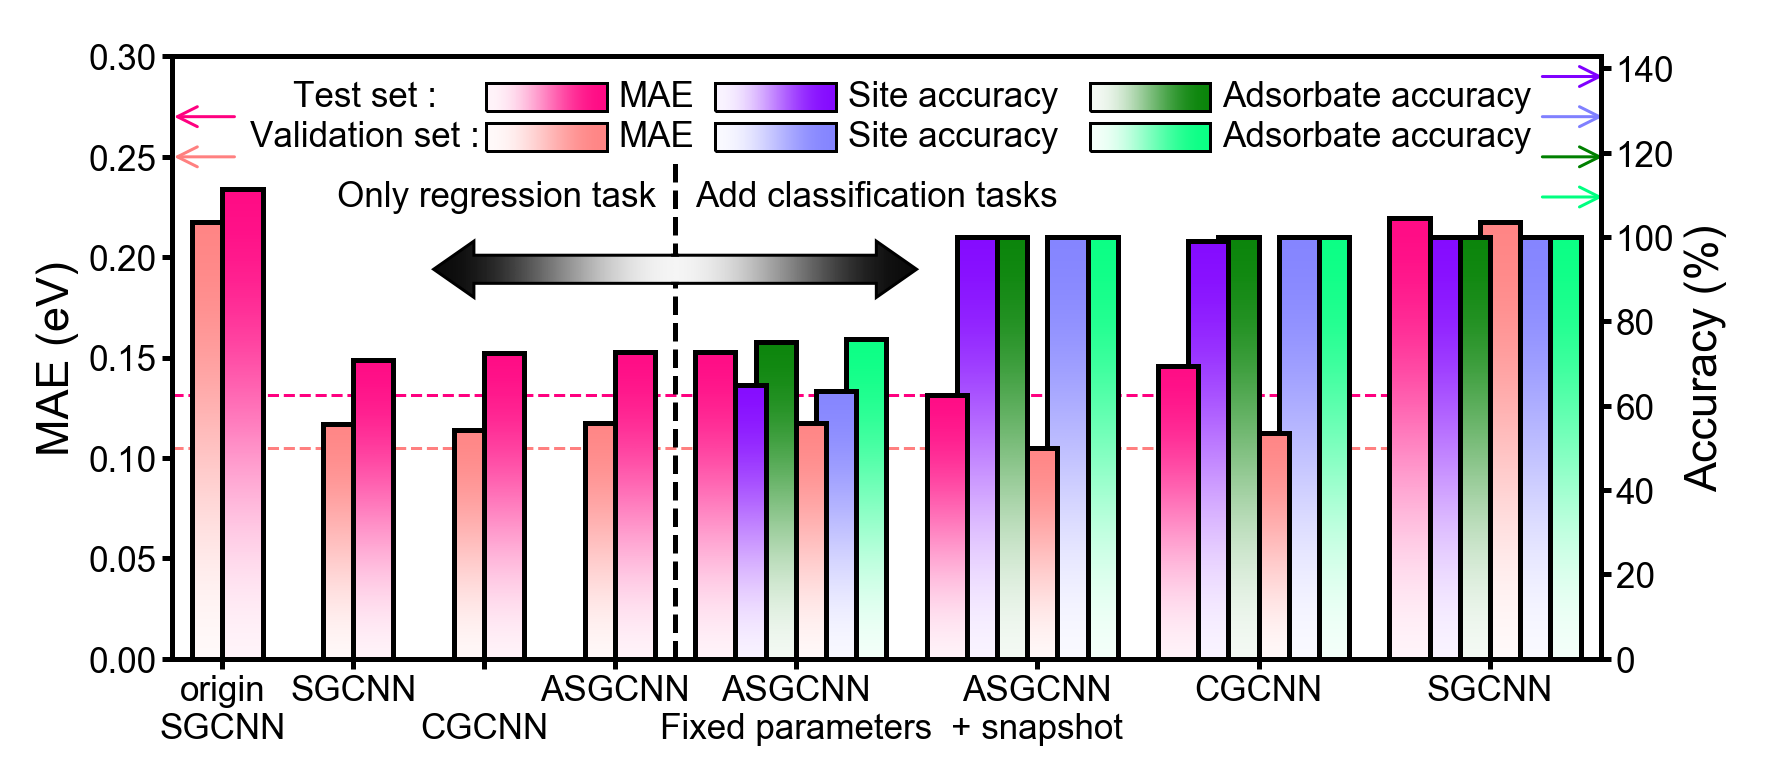

In [7]:
plt.rc('font',family='Arial')
fig=plt.figure(figsize=(12/2.54,5/2.54),dpi=360)

ax0=fig.add_axes([0,0,1,1])
ax0.set_xlim(0,1);ax0.set_ylim(0,1);ax0.set_xticks([]);ax0.set_yticks([]);ax0.axis('off')
ax0.patch.set_alpha(0.0)

ax1=fig.add_axes([0.08,0.12,0.84,0.85])
ax1.patch.set_alpha(0.0)
ax1.tick_params(length=2,width=1,labelsize=7,pad=1)
s_lw=1
ax1.spines['bottom'].set_linewidth(s_lw);ax1.spines['left'].set_linewidth(s_lw)#边框厚度设置
ax1.spines['top'].set_linewidth(s_lw);ax1.spines['right'].set_linewidth(0)
ax1.set_ylabel('MAE (eV)',fontsize=9,labelpad=2)
ax1.set_xlim([-0.5,33.5+1.5])

ek='k'
lw=1
# bar part 1
mae_valid_r=[0.21778065,0.11691202,0.11395679,0.117474906]
mae_test_r=[0.23380084,0.14870445,0.15205829,0.15300313]
x1=np.array([0,3-0.25+0.5,6-0.5+1,9-0.75+1.5])
gra_bar(ax1,x1,mae_valid_r,1,'edge',ek,lw,'#ff8080',2)
gra_bar(ax1,x1+0.75,mae_test_r,1,'edge',ek,lw,'#ff0080',4)
ax1.set_ylim([0,0.3])
# bar part 2
mae_valid_c=[0.117474906,0.10485716,0.11222228,0.2176956]
mae_test_c=[0.15300313,0.1315413,0.14599429,0.21969794]

scale=0.21
ac_valid_c1=np.array([0.636,1,1,1])*scale
ac_valid_c2=np.array([0.758,1,1,1])*scale
ac_test_c1=np.array([0.65,1,0.99,1])*scale
ac_test_c2=np.array([0.752,1,1,1])*scale
x2=np.array([11,18-1.25,25-2.5,32-3.75])+1.5
gra_bar(ax1,x2+3.75,ac_valid_c2,1,'edge',ek,lw,'#00ff80',2)
gra_bar(ax1,x2+3,ac_valid_c1,1,'edge',ek,lw,'#8080ff',4)
gra_bar(ax1,x2+2.25,mae_valid_c,1,'edge',ek,lw,'#ff8080',6)
gra_bar(ax1,x2+1.5,ac_test_c2,1,'edge',ek,lw,'#008000',8)
gra_bar(ax1,x2+0.75,ac_test_c1,1,'edge',ek,lw,'#8000ff',10)
gra_bar(ax1,x2,mae_test_c,1,'edge',ek,lw,'#ff0080',12)

# line
ax1.plot([-0.5,33.5],[0.10485716,0.10485716],zorder=0,color='#ff8080',lw=0.6,ls='--')
ax1.plot([-0.5,33.5],[0.1315413,0.1315413],zorder=0,color='#ff0080',lw=0.6,ls='--')
ax1.plot([12,12],[0,0.25],'k--',lw=1)

#  xticks
ax1.set_xticks([0.75,3.5+0.5,6.25+1,9+1.5,13.5+1.5,19.5+1.5,25+1.5,30.75+1.5])
ax1.set_xticklabels(['origin\nSGCNN','SGCNN','\nCGCNN','ASGCNN',
                    'ASGCNN\nFixed parameters','ASGCNN\n+ snapshot','CGCNN','SGCNN'])
# legend
lwl=0.6
ax1.text(4.3,0.28,'Test set :',fontsize=7,ha='center',va='center')
Gradient_Graphics6(ax1,[7.3,10.3,10.3,7.3],[0.273,0.273,0.287,0.287],[ek,lwl],[(0,'#ff0080'),(1,'w')],[[1,0]],True,1)
ax1.text(10.6,0.28,'MAE',fontsize=7,ha='left',va='center')
Gradient_Graphics6(ax1,[13,16,16,13.],[0.273,0.273,0.287,0.287],[ek,lwl],[(0,'#8000ff'),(1,'w')],[[1,0]],True,1)
ax1.text(16.3,0.28,'Site accuracy',fontsize=7,ha='left',va='center')
Gradient_Graphics6(ax1,[22.3,25.3,25.3,22.3],[0.273,0.273,0.287,0.287],[ek,lwl],[(0,'#008000'),(1,'w')],[[1,0]],True,1)
ax1.text(25.6,0.28,'Adsorbate accuracy',fontsize=7,ha='left',va='center')

ax1.text(4.3,0.26,'Validation set :',fontsize=7,ha='center',va='center')
Gradient_Graphics6(ax1,[7.3,10.3,10.3,7.3],[0.253,0.253,0.267,0.267],[ek,lwl],[(0,'#ff8080'),(1,'w')],[[1,0]],True,1)
ax1.text(10.6,0.26,'MAE',fontsize=7,ha='left',va='center')
Gradient_Graphics6(ax1,[13,16,16,13],[0.253,0.253,0.267,0.267],[ek,lwl],[(0,'#8080ff'),(1,'w')],[[1,0]],True,1)
ax1.text(16.3,0.26,'Site accuracy',fontsize=7,ha='left',va='center')
Gradient_Graphics6(ax1,[22.3,25.3,25.3,22.3],[0.253,0.253,0.267,0.267],[ek,lwl],[(0,'#00ff80'),(1,'w')],[[1,0]],True,1)
ax1.text(25.6,0.26,'Adsorbate accuracy',fontsize=7,ha='left',va='center')

# arrow
ax1.annotate('',(1.3,0.25),(-0.7,0.25),arrowprops=dict(arrowstyle='<-',color='#ff8080',lw=0.6))
ax1.annotate('',(1.3,0.27),(-0.7,0.27),arrowprops=dict(arrowstyle='<-',color='#ff0080',lw=0.6))

ax1.annotate('',(33.3,0.29),(35.3,0.29),arrowprops=dict(arrowstyle='<-',color='#8000ff',lw=0.6))
ax1.annotate('',(33.3,0.27),(35.3,0.27),arrowprops=dict(arrowstyle='<-',color='#8080ff',lw=0.6))
ax1.annotate('',(33.3,0.25),(35.3,0.25),arrowprops=dict(arrowstyle='<-',color='#008000',lw=0.6))
ax1.annotate('',(33.3,0.23),(35.3,0.23),arrowprops=dict(arrowstyle='<-',color='#00ff80',lw=0.6))

# task type
ax1.text(3.6,0.23,'Only regression task',fontsize=7,ha='left',va='center')
ax1.text(12.5,0.23,'Add classification tasks',fontsize=7,ha='left',va='center')
Gradient_Graphics6(ax1,[11.9,17,17,18,17,17,11.9],[0.187,0.187,0.18,0.194,0.208,0.201,0.201],[ek,lwl],[(0,'w'),(1,'k')],[[0,1]],False,1)
Gradient_Graphics6(ax1,[12.1,7,7,6,7,7,12.1],[0.187,0.187,0.18,0.194,0.208,0.201,0.201],[ek,lwl],[(0,'w'),(1,'k')],[[1,0]],False,1)

# ax2

ax2=fig.add_axes([0.91,0.12,0.01,0.85])
ax2.patch.set_alpha(0.0)
ax2.tick_params(length=2,width=1,labelsize=7,pad=1)
ax2.spines['bottom'].set_linewidth(0);ax2.spines['left'].set_linewidth(0)#边框厚度设置
ax2.spines['top'].set_linewidth(0);ax2.spines['right'].set_linewidth(s_lw)
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
ax2.set_ylim([0,10/7*100])
ax2.set_xticks([])
ax2.set_ylabel('Accuracy (%)',fontsize=9,labelpad=2)

# fig.savefig('Figure_3_c.tif',dpi=360)